<a href="https://colab.research.google.com/github/dadakhalander/CORENEWS/blob/master/cleaning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. import necessary dataset
2.read dataset
3.sanity check of data
4.exploring data analysis EDA
5.missiing value treatment
6.outliner treatment
removing higest and lowest from the data,is done only with coontinuos data not with traget one and descrite one
7.duplicates and garbage value treatment
8.normalization
9.enoding of data

To find the **lower whisker** and **upper whisker** for a boxplot (which are key components of the Interquartile Range (IQR) method for detecting outliers), we use the **IQR** to calculate these values.

### **Steps to Calculate Lower and Upper Whiskers**

1. **Calculate the First Quartile (Q1)**: The 25th percentile of the data.
2. **Calculate the Third Quartile (Q3)**: The 75th percentile of the data.
3. **Calculate the IQR**: The difference between Q3 and Q1.
   \[
   \text{IQR} = Q3 - Q1
   \]
4. **Lower Whisker**: The smallest value within the acceptable range (usually defined as \( Q1 - 1.5 \times \text{IQR} \)).
5. **Upper Whisker**: The largest value within the acceptable range (usually defined as \( Q3 + 1.5 \times \text{IQR} \)).

---

### **Formula:**
- **Lower Whisker**:
  \[
  \text{Lower Whisker} = Q1 - 1.5 \times \text{IQR}
  \]
  
- **Upper Whisker**:
  \[
  \text{Upper Whisker} = Q3 + 1.5 \times \text{IQR}
  \]

Any data points outside these whiskers are considered outliers.

---

### **Steps in Code**

Here's how you can calculate the lower and upper whiskers using Python and pandas:

```python
import pandas as pd

# Sample DataFrame
data = {
    'Value': [10, 12, 14, 100, 16, 18, 20, 25, 30, 1000]
}
df = pd.DataFrame(data)

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper whiskers
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Print the values
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")
```

### **Output Example:**

```
Lower Whisker: -1.0
Upper Whisker: 45.0
```

This means that any data points below `-1.0` or above `45.0` would be considered outliers.

---

### **Boxplot Visualization (Optional)**

You can visualize the whiskers and outliers using a **boxplot** in libraries like `matplotlib` or `seaborn`:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
sns.boxplot(x=df['Value'])
plt.show()
```

This will show the whiskers on the boxplot along with any outliers marked separately.

### **Conclusion:**
- The **lower whisker** and **upper whisker** are derived using the IQR method.
- The values outside these whiskers are considered **outliers**.


An **outlier** in data refers to a data point that significantly deviates from the rest of the values in a dataset. Outliers can either be unusually high or low values that stand out when compared to other data points.

Outliers are important to detect because they can:
- Skew or distort statistical analysis (e.g., affecting the mean and standard deviation).
- Indicate errors or anomalies in the data.
- Suggest interesting insights or special cases in the dataset (for example, fraud detection, rare events).

### **Types of Outliers**
1. **Univariate Outliers**: Outliers in a single variable (column).
2. **Multivariate Outliers**: Outliers that arise from the relationships between two or more variables.

### **How to Detect Outliers**
There are several methods to detect outliers. Below are the most common ones:

---

### **1. Statistical Methods**
- **Z-Score (Standard Deviation Method)**:
  The Z-score measures how many standard deviations away a data point is from the mean. A Z-score greater than 3 (or less than -3) typically indicates an outlier.

  Formula for Z-score:
  \[
  Z = \frac{X - \mu}{\sigma}
  \]
  Where:
  - \(X\) is the data point
  - \(\mu\) is the mean
  - \(\sigma\) is the standard deviation

  ```python
  from scipy.stats import zscore
  import pandas as pd

  df = pd.DataFrame({'Value': [10, 12, 14, 100, 16, 18, 20]})
  df['Z-Score'] = zscore(df['Value'])
  outliers = df[df['Z-Score'].abs() > 3]
  print(outliers)
  ```

- **IQR (Interquartile Range)**:
  The IQR is the range between the 25th and 75th percentiles (Q1 and Q3). Outliers are typically defined as data points that fall below \( Q1 - 1.5 \times IQR \) or above \( Q3 + 1.5 \times IQR \).

  Formula for IQR:
  \[
  IQR = Q3 - Q1
  \]
  Then, calculate the bounds:
  \[
  \text{Lower bound} = Q1 - 1.5 \times IQR
  \]
  \[
  \text{Upper bound} = Q3 + 1.5 \times IQR
  \]

  ```python
  # Calculate IQR and identify outliers
  Q1 = df['Value'].quantile(0.25)
  Q3 = df['Value'].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
  print(outliers)
  ```

---

### **2. Visualization Methods**
- **Boxplot**: A boxplot provides a graphical representation of the IQR and visually highlights potential outliers. Data points that lie beyond the "whiskers" of the boxplot are typically considered outliers.
  
  ```python
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  sns.boxplot(x=df['Value'])
  plt.show()
  ```

- **Scatter Plot**: A scatter plot is useful for detecting outliers, especially in bivariate datasets. Outliers will appear as points far away from the general cluster of data points.

  ```python
  plt.scatter(df['X'], df['Y'])
  plt.show()
  ```

---

### **3. Machine Learning-Based Methods**
- **Isolation Forest**: A machine learning model specifically designed to detect outliers. It isolates observations by randomly selecting features and splitting them. Outliers are isolated faster than normal data points.

  ```python
  from sklearn.ensemble import IsolationForest
  
  model = IsolationForest(contamination=0.1)
  outliers = model.fit_predict(df[['Value']])
  df['Outlier'] = outliers
  print(df[df['Outlier'] == -1])  # Outliers are marked as -1
  ```

- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: A clustering method that identifies outliers as data points that don't belong to any cluster.

  ```python
  from sklearn.cluster import DBSCAN
  
  model = DBSCAN(eps=0.5, min_samples=5)
  df['Cluster'] = model.fit_predict(df[['X', 'Y']])
  print(df[df['Cluster'] == -1])  # Outliers are marked as -1
  ```

---

### **Handling Outliers**
Once outliers are identified, there are various ways to handle them:

1. **Remove Outliers**: In some cases, it's best to remove outliers, especially if they are due to data errors.
   ```python
   df = df[(df['Value'] > lower_bound) & (df['Value'] < upper_bound)]
   ```

2. **Cap or Transform Outliers**: You can cap outliers to a maximum or minimum threshold (e.g., by replacing them with the 95th percentile or using logarithmic transformations).
   ```python
   df['Value'] = df['Value'].clip(lower=df['Value'].quantile(0.05), upper=df['Value'].quantile(0.95))
   ```

3. **Impute Outliers**: In some cases, you can replace outliers with the mean, median, or mode of the column.
   ```python
   median = df['Value'].median()
   df['Value'] = df['Value'].apply(lambda x: median if x > upper_bound else x)
   ```

---

### **When to Keep or Remove Outliers?**

- **Keep Outliers**: If the outliers represent important phenomena (e.g., fraud detection, rare events), you may choose to keep them.
- **Remove Outliers**: If the outliers are due to errors in data collection or if they significantly distort the analysis, removing them might be the best option.

---

### **Conclusion**
- **Outliers** are values that are significantly different from other data points in a dataset.
- They can be detected using statistical methods like **Z-score** or **IQR**, or through visualization methods like **boxplots**.
- Handling outliers depends on their context and impact on the analysis. You can remove, cap, transform, or impute outliers as needed.

If you need help identifying or dealing with outliers in your specific dataset, feel free to share more details, and I can guide you further!

step :1  import necessary dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = r'/content/Life-Expectancy-Data.csv.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df =pd.read_excel("Life-Expectancy-Data.csv.xlsx")
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5


In [ ]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
df.isnull()["Total expenditure"].sum()



226

In [ ]:
# find the percentage of each
#section by using sum of null divided
#by shape multiple with 100
df.isnull().sum()/df.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
print('')

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [ ]:
df.describe(include="int")

,Year,infant deaths,Measles,under-five deaths
count,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,30.303948,2419.592240,42.035739
std,4.613841,117.926501,11467.272489,160.445548
min,2000.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000
50%,2008.000000,3.000000,17.000000,4.000000
75%,2012.000000,22.000000,360.250000,28.000000
max,2015.000000,1800.000000,212183.000000,2500.000000


In [ ]:
df.describe(include="object")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [ ]:
df.describe(include="float")

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2744.000000,2938.000000,2385.000000,2904.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,4.602861,738.251295,80.940461,38.321247,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,4.052413,1987.914858,25.070016,20.044034,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.010000,0.000000,1.000000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.877500,4.685343,77.000000,19.300000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.755000,64.912906,92.000000,43.500000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,7.702500,441.534144,97.000000,56.200000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,17.870000,19479.911610,99.000000,87.300000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


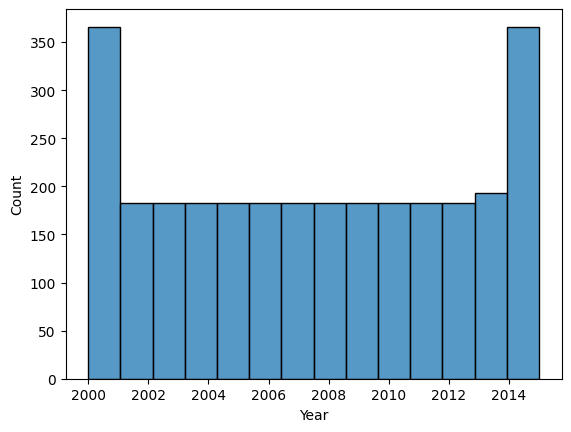

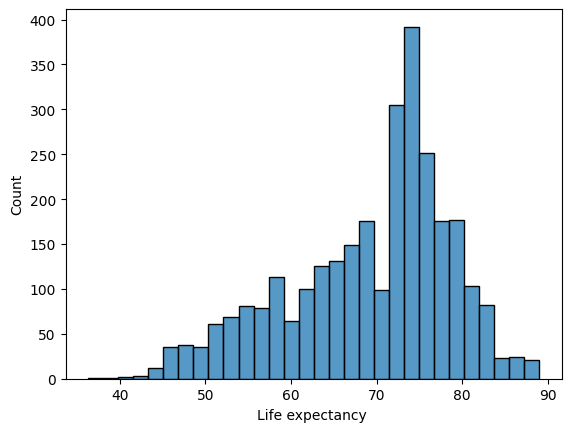

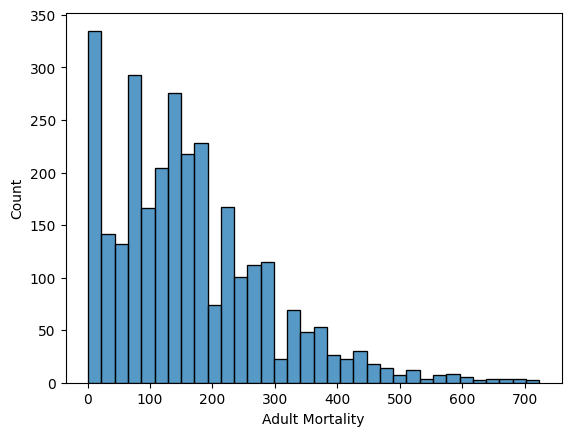

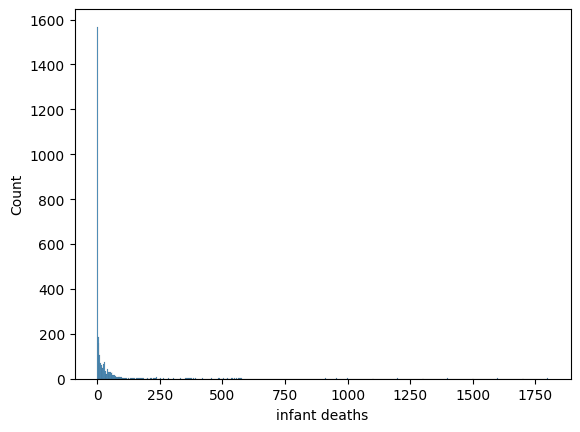

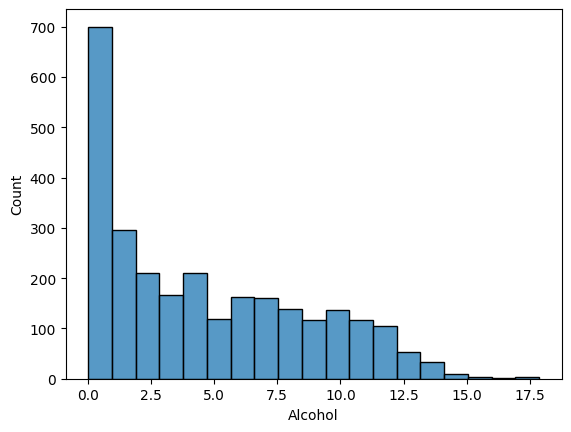

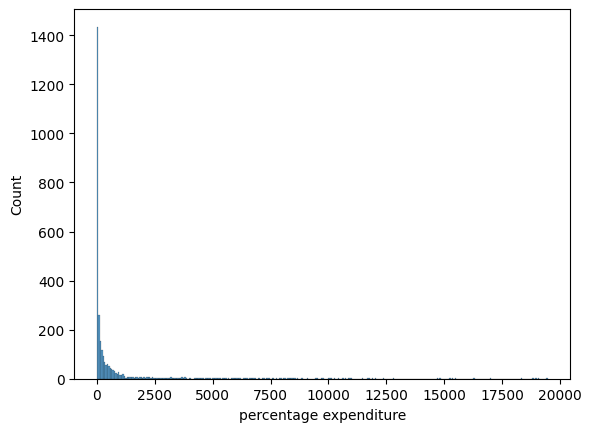

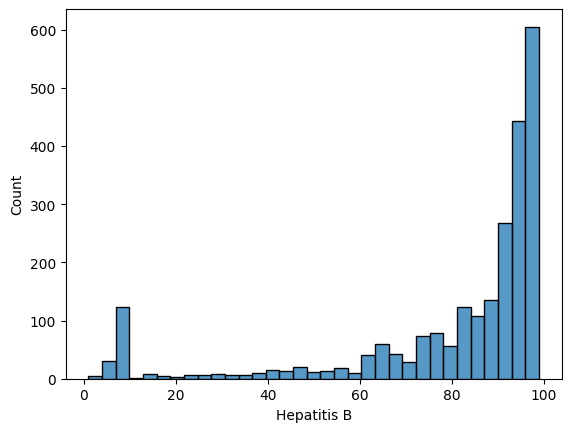

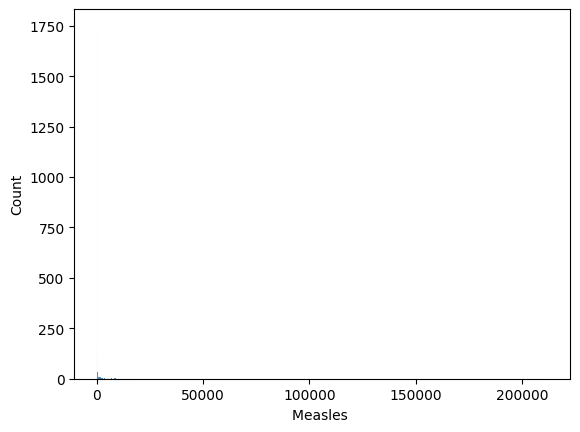

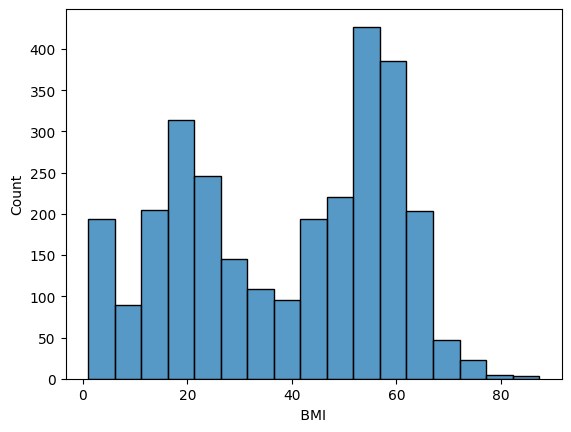

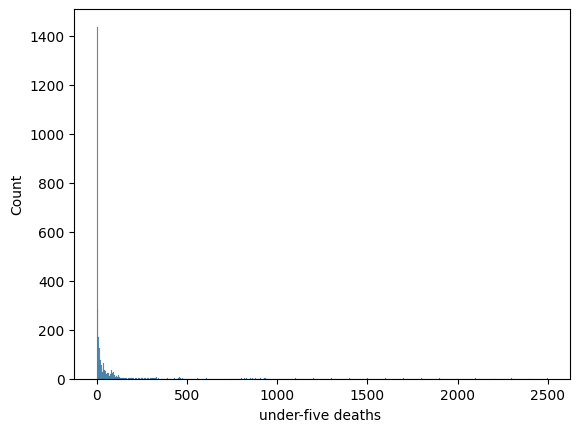

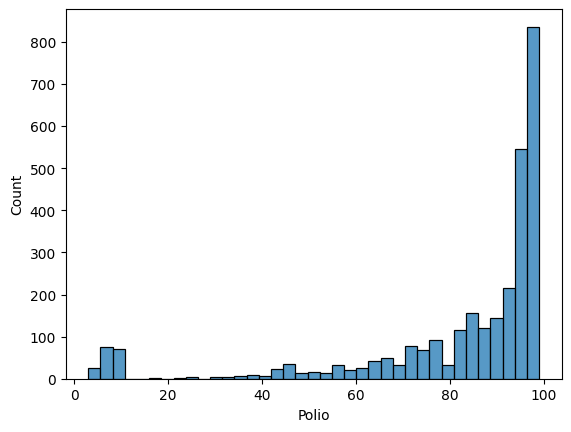

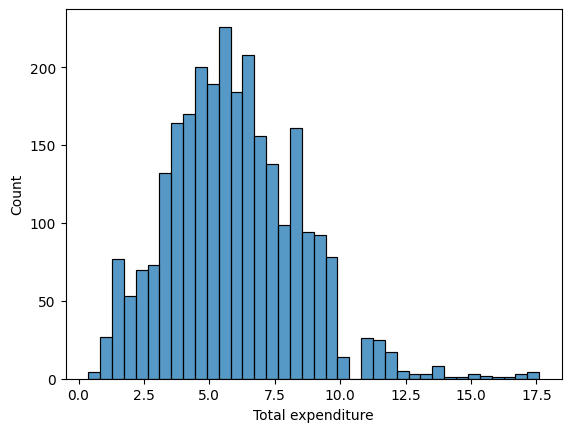

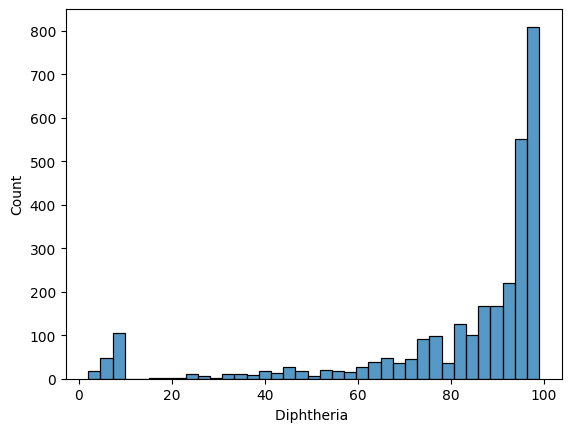

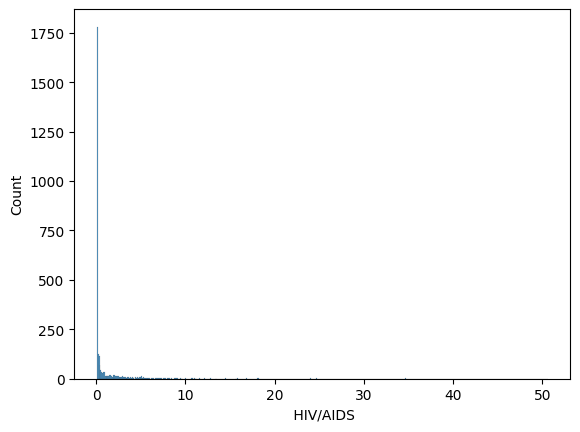

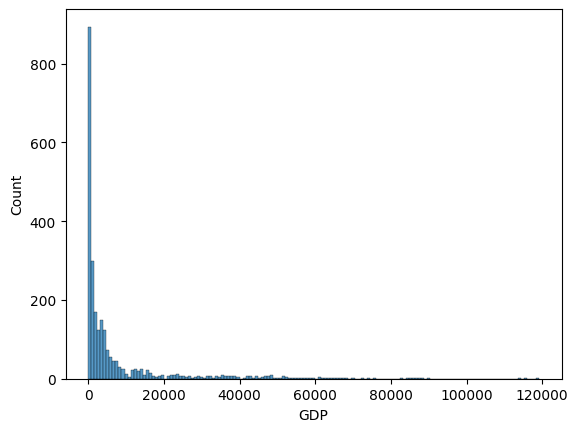

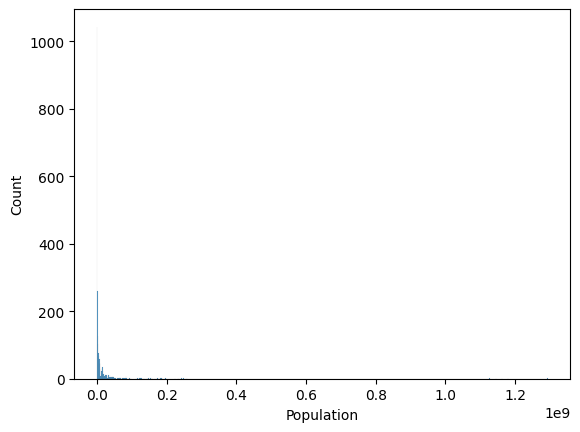

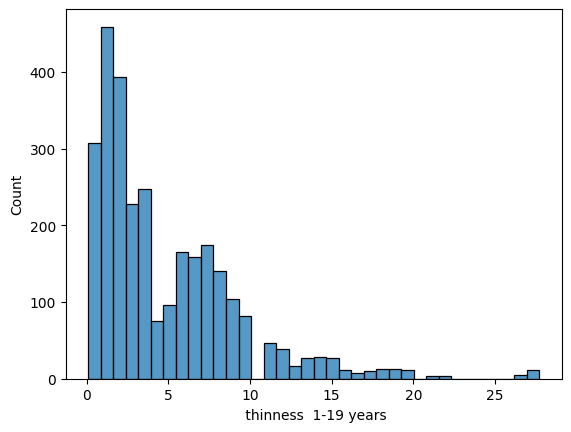

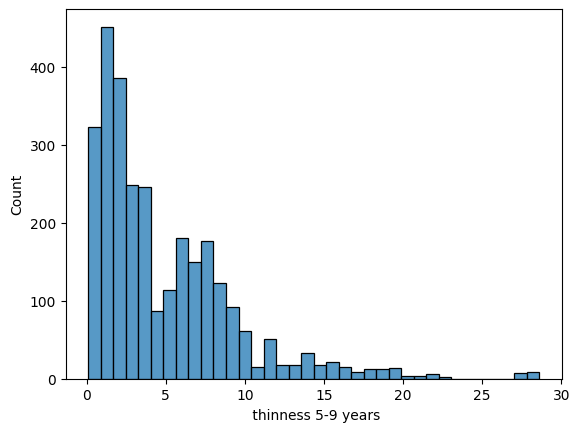

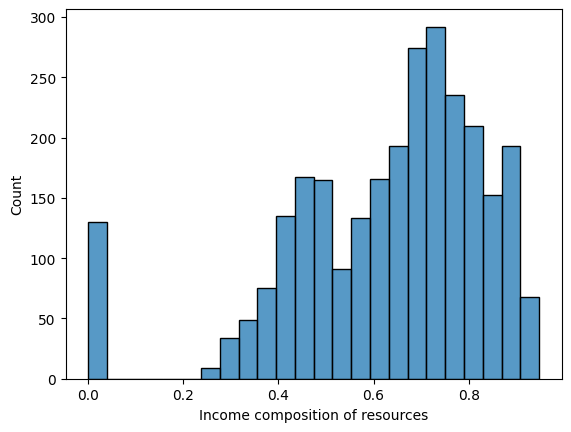

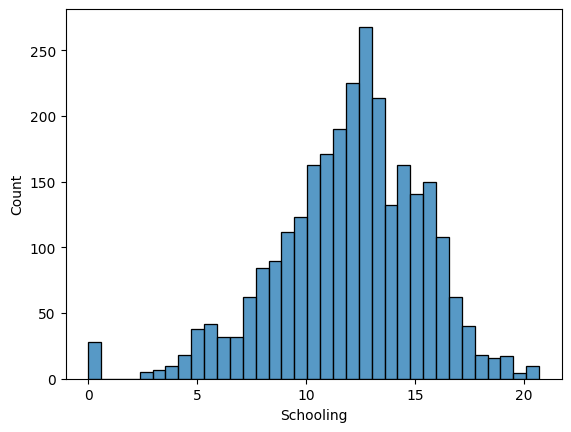

In [ ]:
#import warniings
#warnings.filterwarnings("ignore")
# doing histogram to understand more about the data

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()


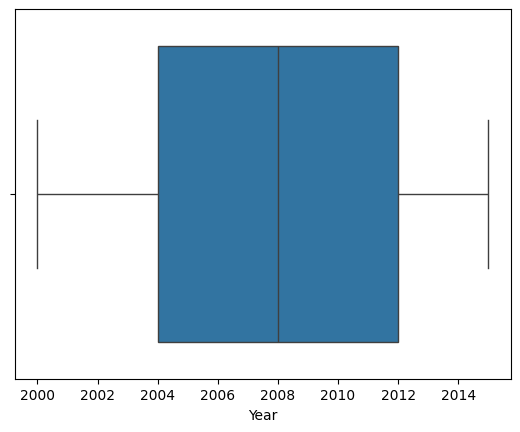

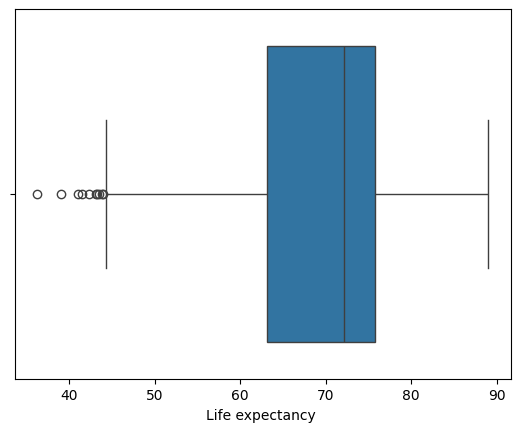

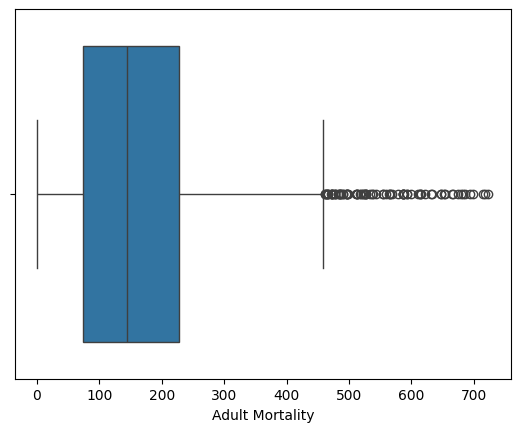

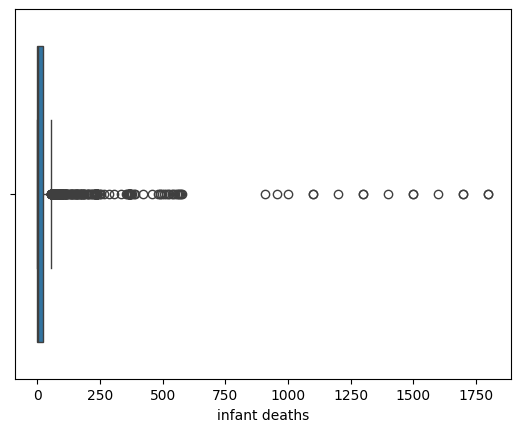

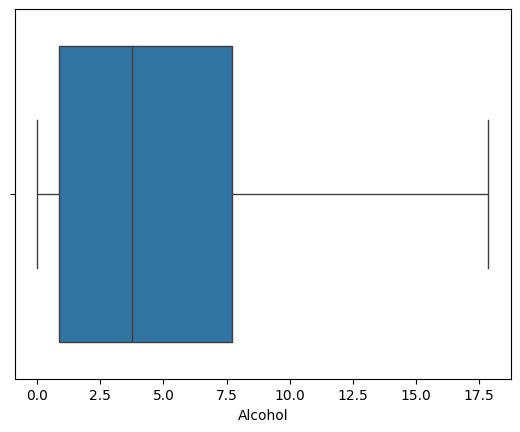

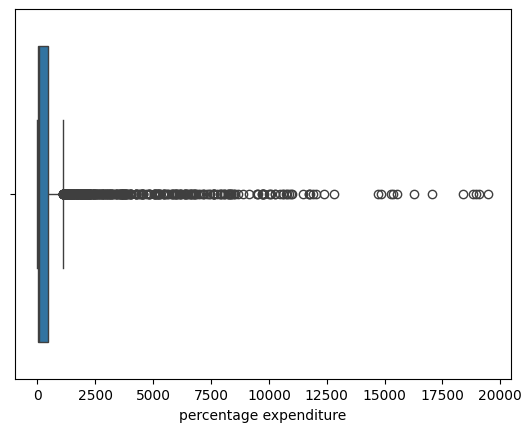

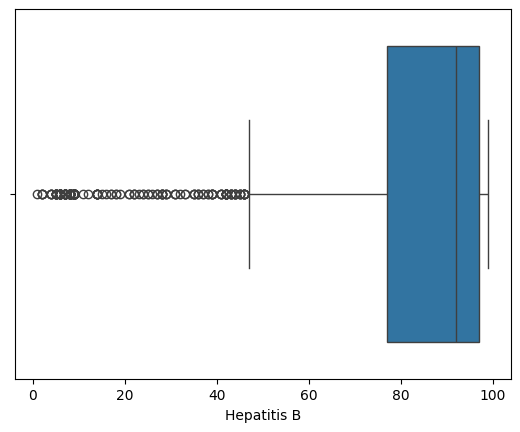

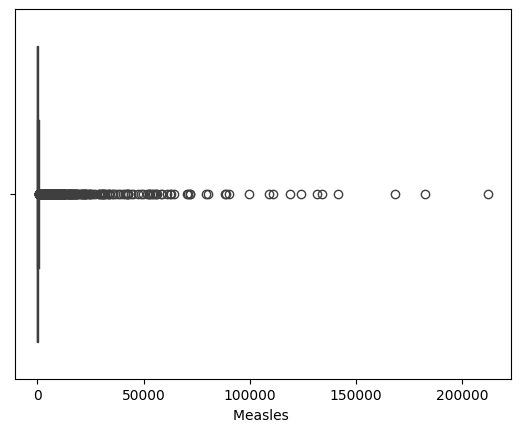

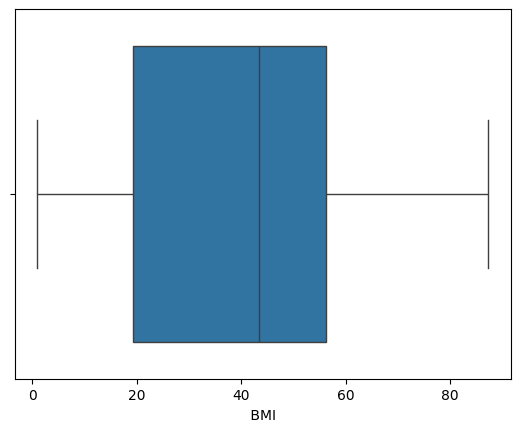

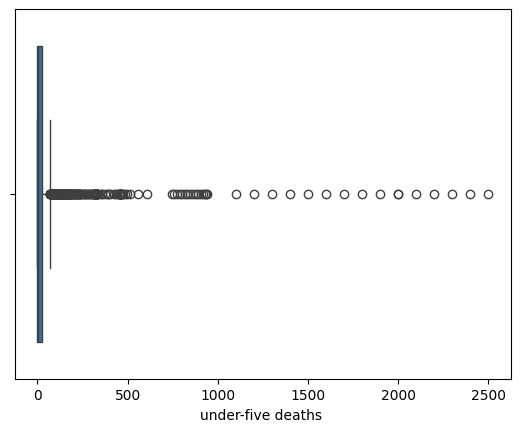

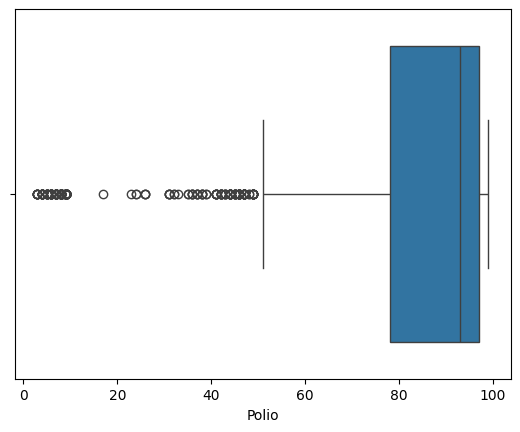

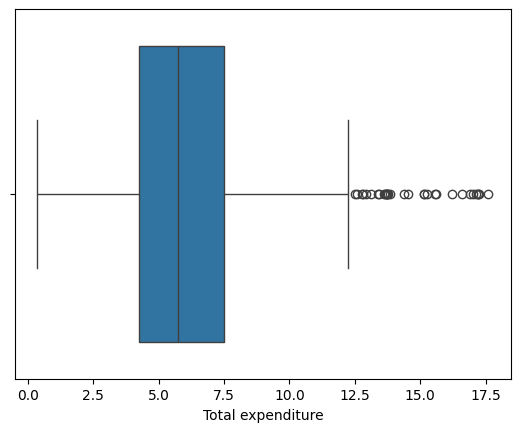

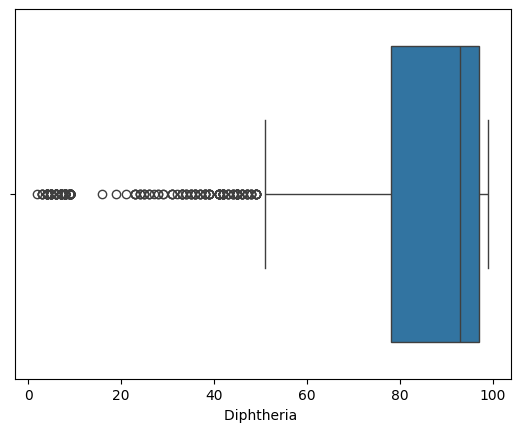

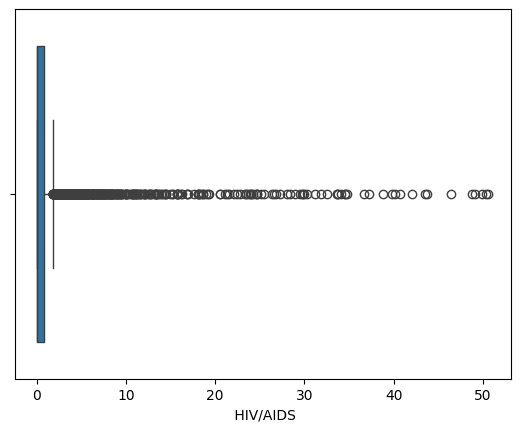

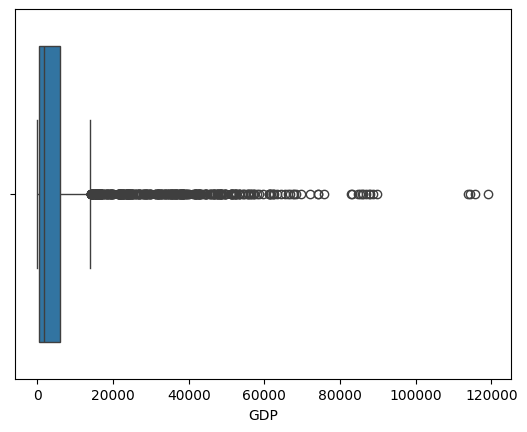

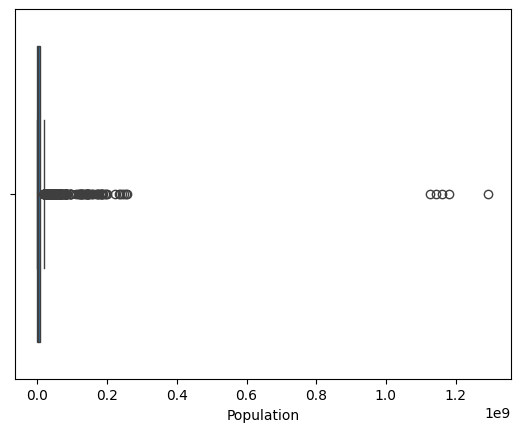

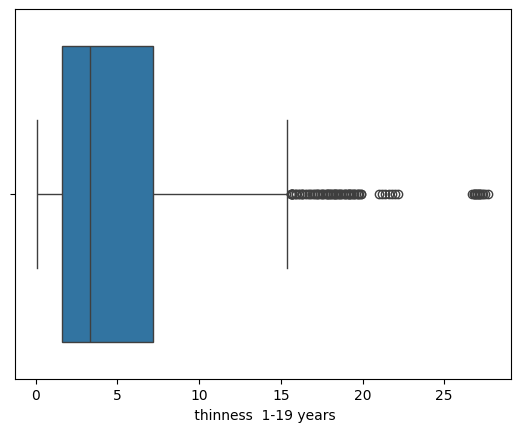

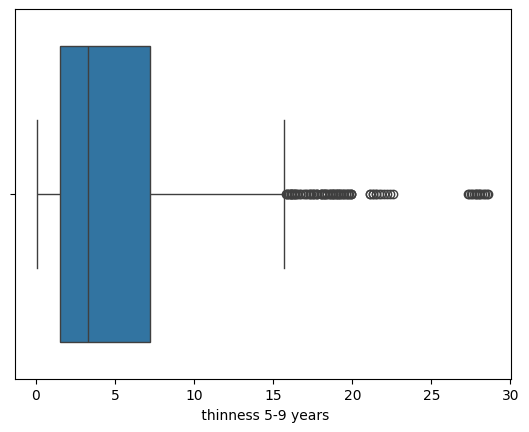

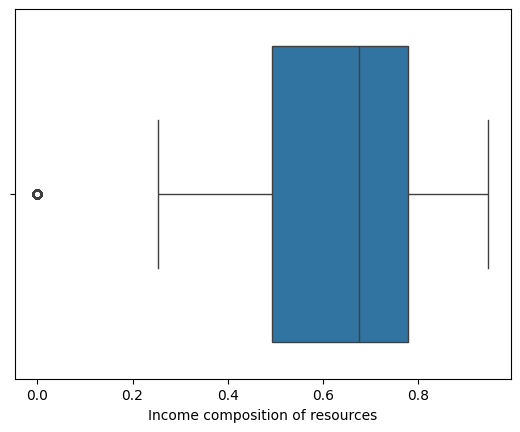

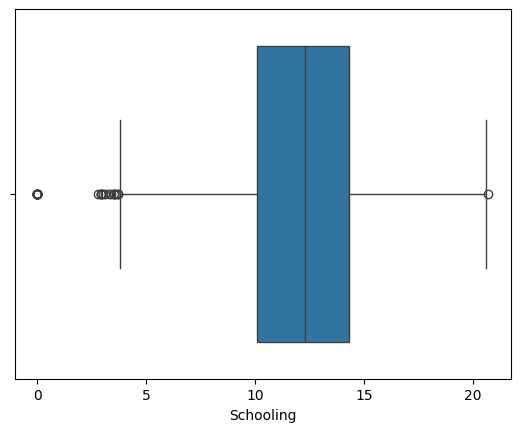

In [ ]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
df.select_dtypes(include="number")

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.select_dtypes(include="number").columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

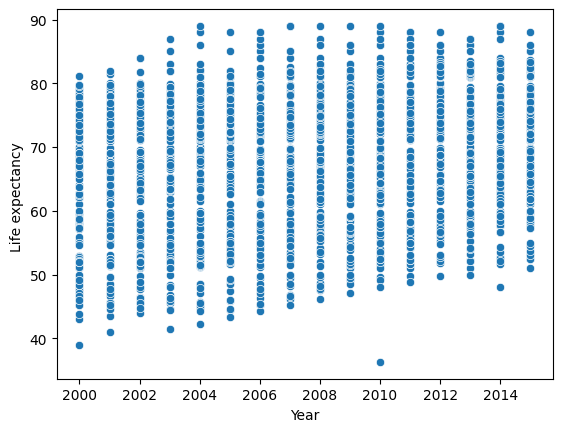

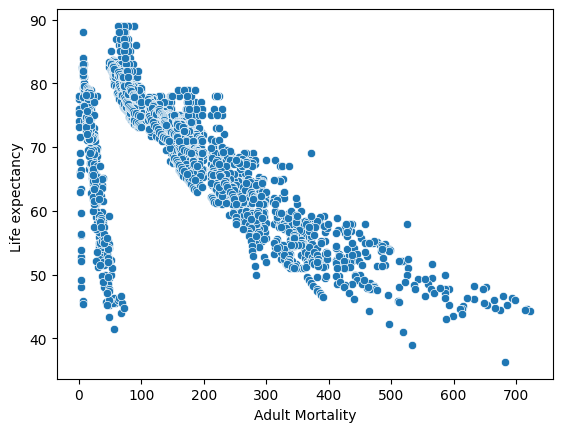

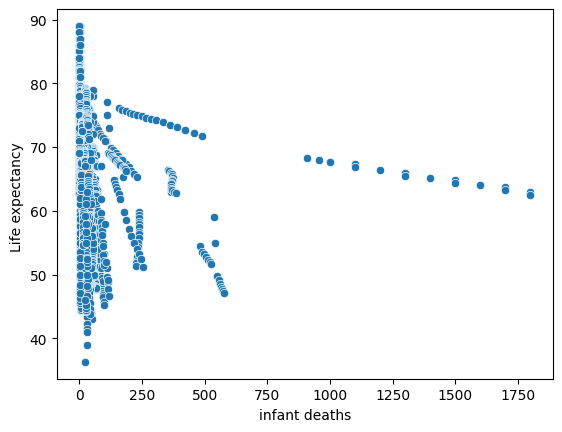

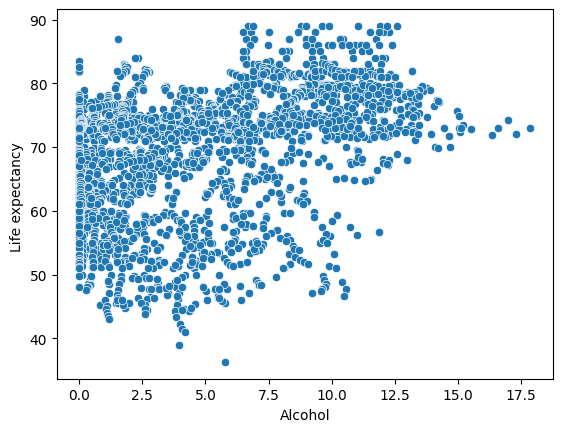

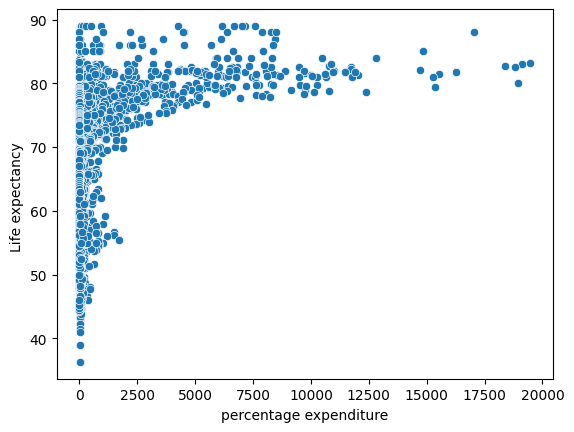

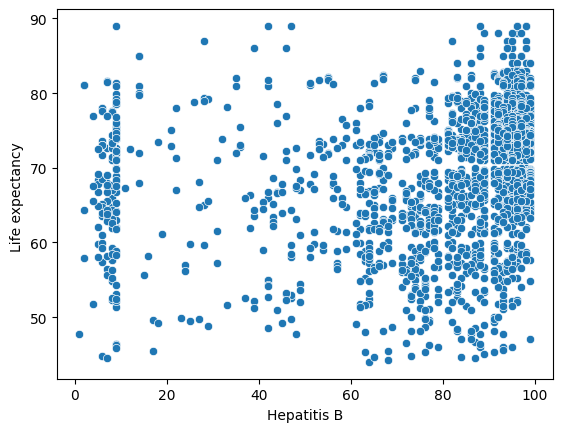

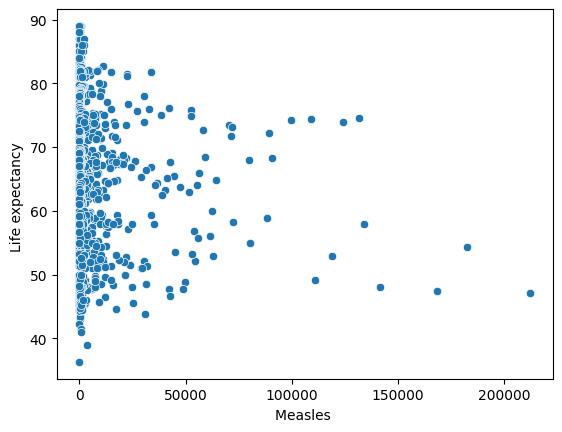

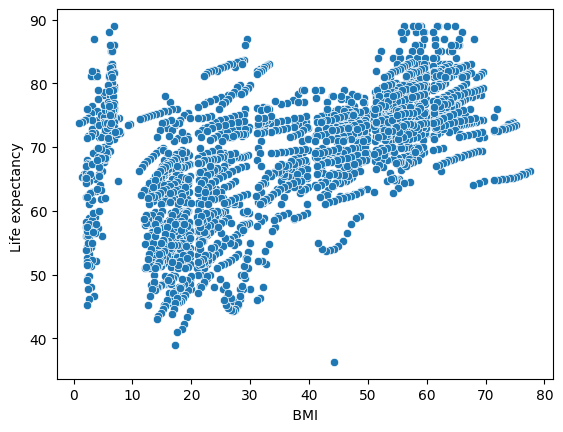

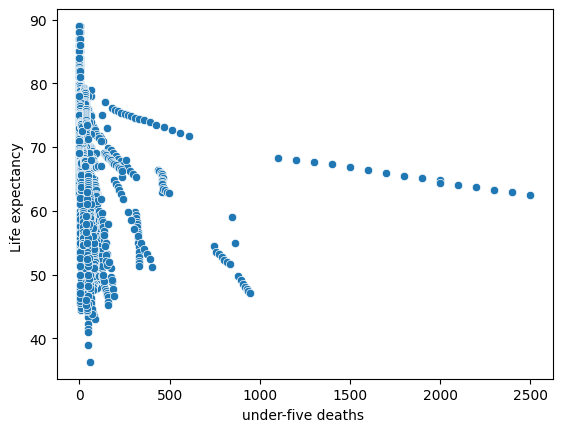

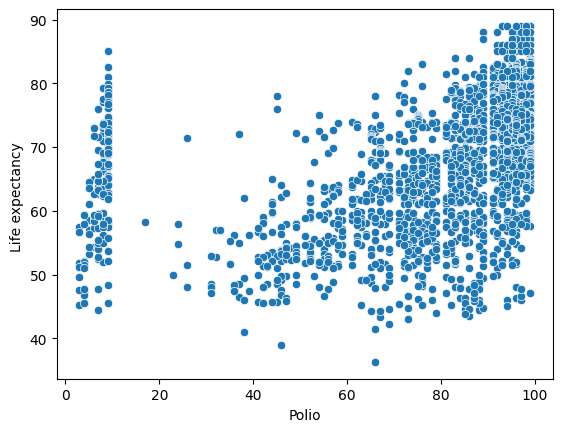

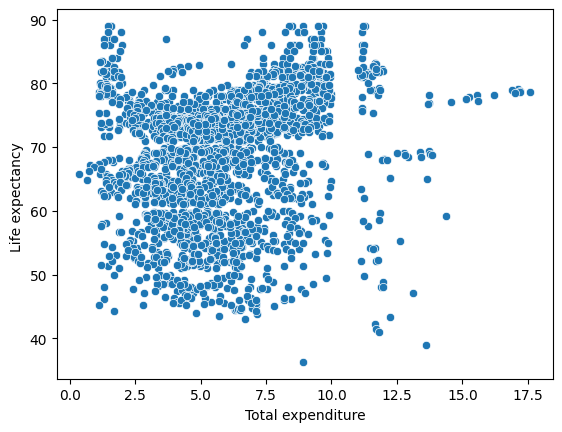

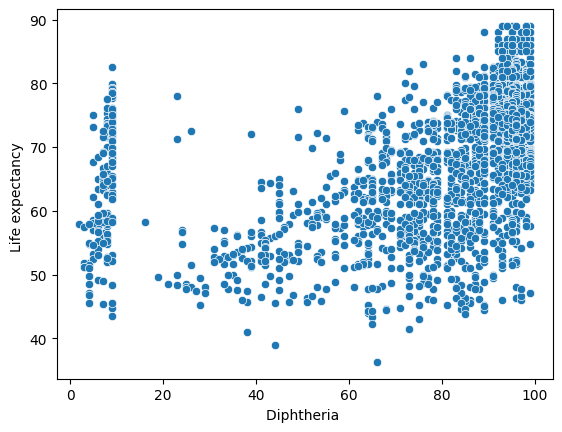

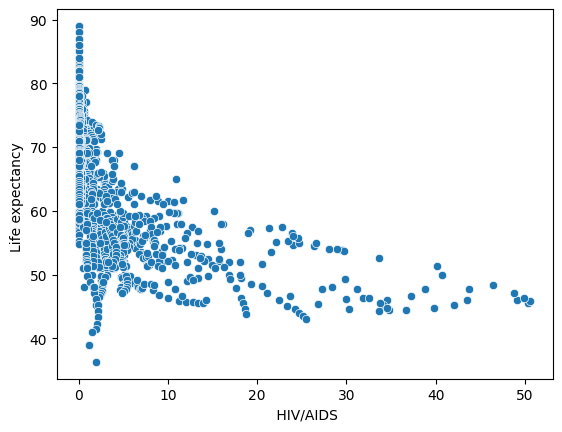

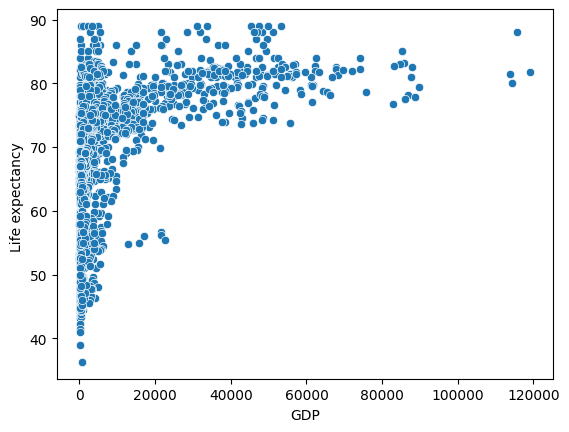

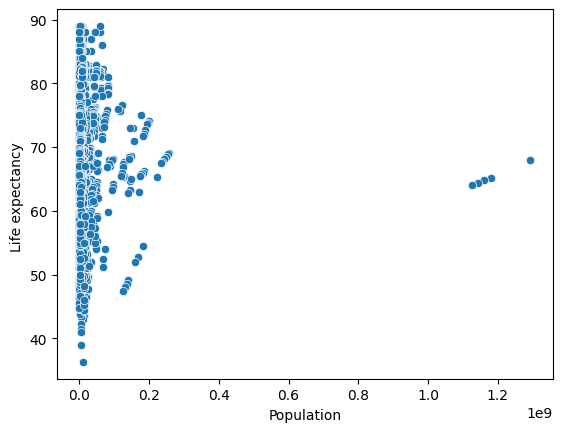

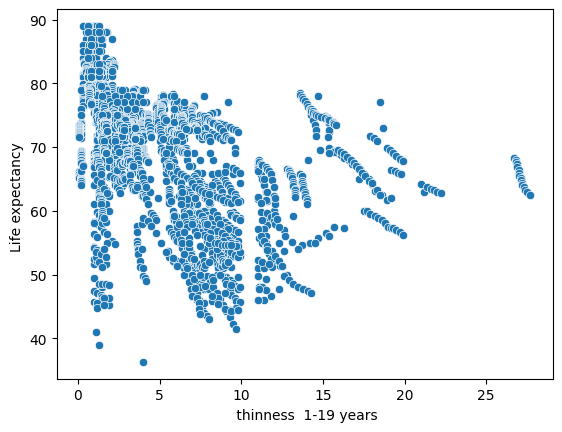

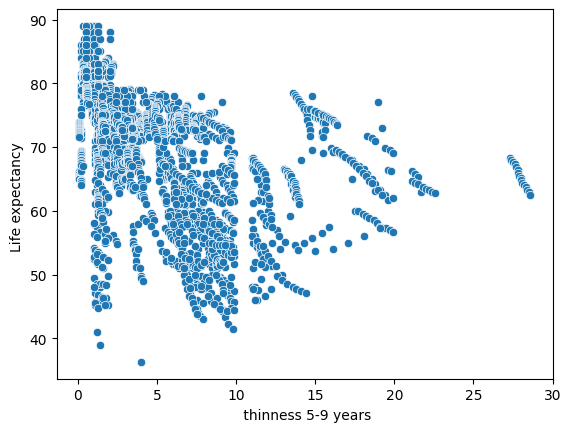

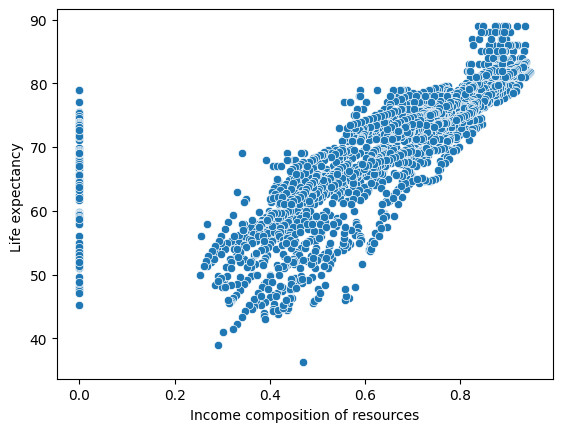

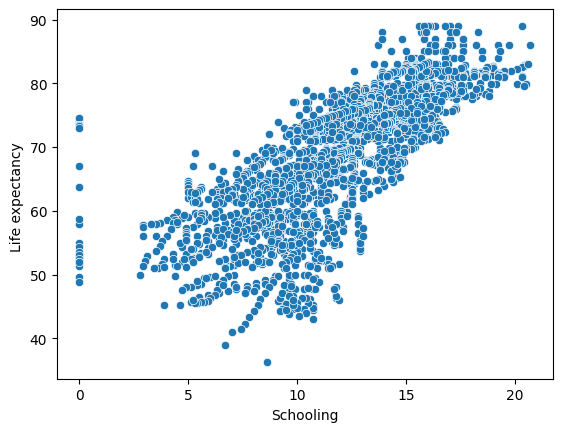

In [ ]:
# to create a scatter plot of above data u show have a point to ananlysis the data
for i in['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']:

      sns.scatterplot(data=df,x=i,y="Life expectancy ")
      plt.show()


In [ ]:
df.select_dtypes(include="number").corr()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [ ]:
a=df.select_dtypes(include="number").corr()

<Axes: >

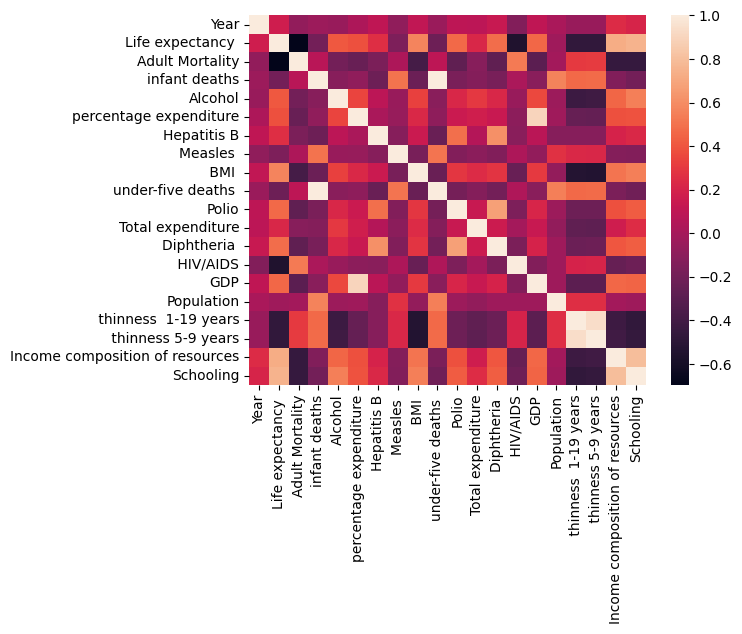

In [ ]:
sns.heatmap(a)

<Axes: >

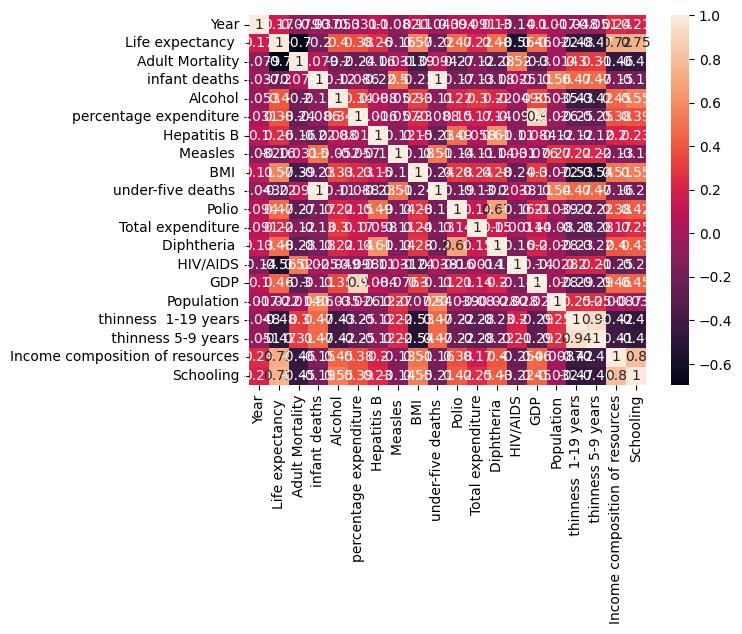

In [ ]:
sns.heatmap(a,annot=True)

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
for i in [" BMI ", "Income composition of resources", "Polio"]:
    df[i].fillna(df[i].median(), inplace=True)

<ipython-input-97-7af04761d15f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)


In [ ]:
for i in ["GDP", "Schooling", " thinness 5-9 years"]:
    df[i].fillna(df[i].median(), inplace=True)

<ipython-input-102-56cd491616ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
#uses nearest to missing value and make it zero

from sklearn.impute import KNNImputer
imputer=KNNImputer()


In [ ]:
for i in df.select_dtypes(include="number").columns:
  df[i]=imputer.fit_transform(df[[i]])

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
df.select_dtypes(include="number").columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
def whisker(column):

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)


    IQR = Q3 - Q1

    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    return lower_whisker, upper_whisker


In [ ]:
lower, upper = whisker(df['GDP'])
print(f"Lower Whisker: {lower}")
print(f"Upper Whisker: {upper}")

Lower Whisker: -5717.890296249999
Upper Whisker: 11077.782481749999


In [ ]:
for i in ['GDP','Total expenditure',' thinness  1-19 years',
       ' thinness 5-9 years']:
       lw,uw=whisker(df[i])
       df[i]=np.where(df[i]>uw,uw,df[i])
       df[i]=np.where(df[i]<lw,lw,df[i])


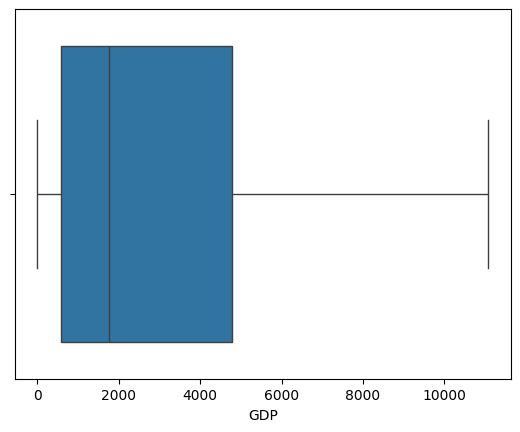

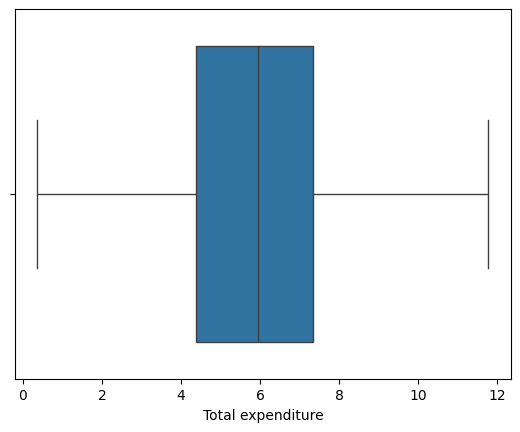

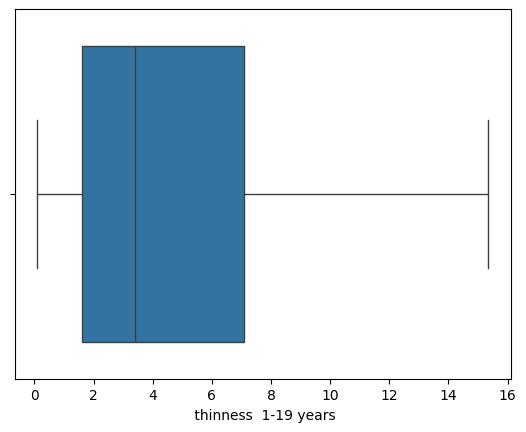

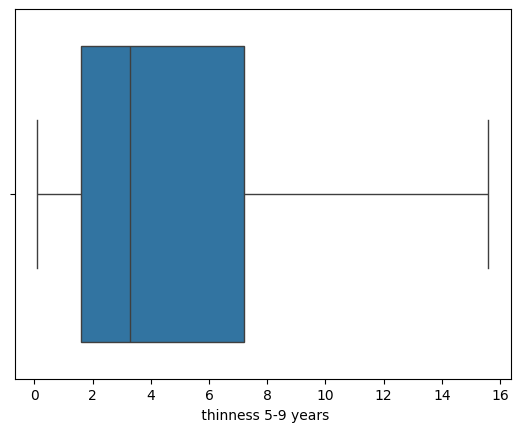

In [ ]:
for i in ['GDP','Total expenditure',' thinness  1-19 years',
       ' thinness 5-9 years']:
       sns.boxplot(data=df,x=i)
       plt.show()

drop the duplicates
------df.drop_duplicates()

1. convert of object into numerical data is called encoding
-----------create dumies,pandas

In [ ]:
dumy=pd.get_dummies(data=df, columns=["Country", "Status"], drop_first=True)

In [ ]:
dumy

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True


from matplotlib import pyplot as plt
dumy['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dumy['Life expectancy '].plot(kind='hist', bins=20, title='Life expectancy ')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dumy['Adult Mortality'].plot(kind='hist', bins=20, title='Adult Mortality')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dumy['infant deaths'].plot(kind='hist', bins=20, title='infant deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dumy.groupby('Country_Albania').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dumy.groupby('Country_Algeria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dumy.groupby('Country_Angola').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
dumy.groupby('Country_Antigua and Barbuda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dumy.plot(kind='scatter', x='Year', y='Life expectancy ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dumy.plot(kind='scatter', x='Life expectancy ', y='Adult Mortality', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dumy.plot(kind='scatter', x='Adult Mortality', y='infant deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dumy.plot(kind='scatter', x='infant deaths', y='Alcohol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Life expectancy ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dumy.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country_Albania')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country_Albania', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Life expectancy ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Life expectancy ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dumy.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country_Algeria')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country_Algeria', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Life expectancy ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Life expectancy ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dumy.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country_Angola')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country_Angola', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Life expectancy ')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Life expectancy ']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dumy.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country_Antigua and Barbuda')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country_Antigua and Barbuda', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Life expectancy ')

from matplotlib import pyplot as plt
dumy['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dumy['Life expectancy '].plot(kind='line', figsize=(8, 4), title='Life expectancy ')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dumy['Adult Mortality'].plot(kind='line', figsize=(8, 4), title='Adult Mortality')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dumy['infant deaths'].plot(kind='line', figsize=(8, 4), title='infant deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country_Algeria'].value_counts()
    for x_label, grp in dumy.groupby('Country_Albania')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country_Albania')
_ = plt.ylabel('Country_Algeria')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country_Angola'].value_counts()
    for x_label, grp in dumy.groupby('Country_Algeria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country_Algeria')
_ = plt.ylabel('Country_Angola')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country_Antigua and Barbuda'].value_counts()
    for x_label, grp in dumy.groupby('Country_Angola')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country_Angola')
_ = plt.ylabel('Country_Antigua and Barbuda')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country_Argentina'].value_counts()
    for x_label, grp in dumy.groupby('Country_Antigua and Barbuda')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country_Antigua and Barbuda')
_ = plt.ylabel('Country_Argentina')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dumy['Country_Albania'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dumy, x='Year', y='Country_Albania', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dumy['Country_Algeria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dumy, x='Year', y='Country_Algeria', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dumy['Country_Angola'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dumy, x='Year', y='Country_Angola', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dumy['Country_Antigua and Barbuda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dumy, x='Year', y='Country_Antigua and Barbuda', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)